In [1]:
import os
os.environ["CUDA_VISIBLE_DEVICES"]="0"

!nvidia-smi

Thu Jun 20 16:04:25 2024       
+-----------------------------------------------------------------------------------------+
| NVIDIA-SMI 550.54.15              Driver Version: 550.54.15      CUDA Version: 12.4     |
|-----------------------------------------+------------------------+----------------------+
| GPU  Name                 Persistence-M | Bus-Id          Disp.A | Volatile Uncorr. ECC |
| Fan  Temp   Perf          Pwr:Usage/Cap |           Memory-Usage | GPU-Util  Compute M. |
|                                         |                        |               MIG M. |
|=========================================+========================+======================|
|   0  NVIDIA GeForce RTX 4090        Off |   00000000:19:00.0 Off |                  Off |
|  0%   47C    P8             30W /  450W |      11MiB /  24564MiB |      0%      Default |
|                                         |                        |                  N/A |
+-----------------------------------------+-----

### Pipeline

In [93]:
import torch
from diffusers import StableDiffusionPipeline, DDPMScheduler

pipe = StableDiffusionPipeline.from_single_file("/data/sd_files/stable-diffusion-v1-5/v1-5-pruned.safetensors",
                                               torch_dtype=torch.float16, use_safetensors=True, variant="fp16")

# pipe = StableDiffusionPipeline.from_single_file("/data/sd_files/checkpoint/beautifulRealistic_v7.safetensors",
#                                                torch_dtype=torch.float16, use_safetensors=True, variant="fp16")

pipe.to("cuda")
pipe.scheduler = DDPMScheduler.from_config(pipe.scheduler.config)

print('done')

In this conversion only the non-EMA weights are extracted. If you want to instead extract the EMA weights (usually better for inference), please make sure to add the `--extract_ema` flag.
/home/scpark/anaconda3/envs/ste/lib/python3.9/site-packages/torch/_utils.py:776: UserWarning: TypedStorage is deprecated. It will be removed in the future and UntypedStorage will be the only storage class. This should only matter to you if you are using storages directly.  To access UntypedStorage directly, use tensor.untyped_storage() instead of tensor.storage()
  return self.fget.__get__(instance, owner)()
/home/scpark/anaconda3/envs/ste/lib/python3.9/site-packages/transformers/models/clip/feature_extraction_clip.py:28: FutureWarning: The class CLIPFeatureExtractor is deprecated and will be removed in version 5 of Transformers. Please use CLIPImageProcessor instead.
  warnings.warn(


done


### Generate Image

Token indices sequence length is longer than the specified maximum sequence length for this model (110 > 77). Running this sequence through the model will result in indexing errors
The following part of your input was truncated because CLIP can only handle sequences up to 77 tokens: [', hair ornament, long sleeves, white shirt, upper body, necktie, black eyes, lips, realistic, kooo 1 2 3, lora chaewo']
100%|███████████████████████████████████████████| 20/20 [00:02<00:00,  6.99it/s]


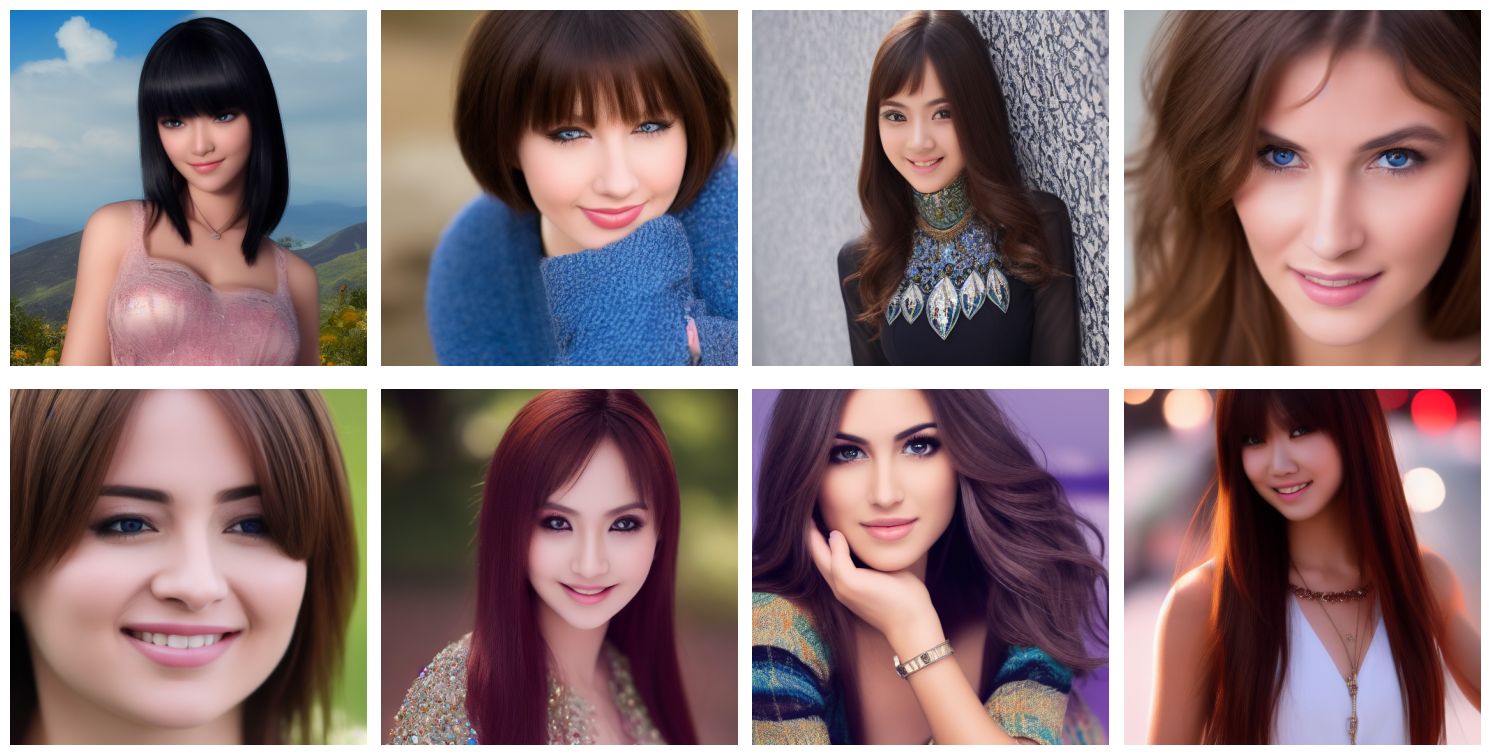

In [94]:
# prompt from https://civitai.com/images/16407281

prompt = "(RAW photo, best quality), (realistic, photo-realistic:1.4), masterpiece, extremely beautiful, extremely detailed, 4k wallpaper, Amazing, finely detail, ultra-detailed, highres, beautiful detailed girl, extremely detailed eyes and face, 1girl, solo, looking at viewer, smile, short hair, bangs, simple background, shirt, black hair, hair ornament, long sleeves, white shirt, upper body, necktie, black eyes, lips, realistic, kooo123, lora CHAEWO"
n_prompt = "3d, sepia, painting, cartoons, sketch, watercolor, flat color, (worst quality:2), (low quality:2), (normal quality:2),out of focus,ugly,error, bad anatomy, ((monochrome)), (grayscale), deformed eyes, bad face,(worst quality:2), (low quality:2), (normal quality:2), (bad hands :1.8) ng_deepnegative_v1_75t"

images = pipe(prompt=prompt,
             negative_prompt=n_prompt,
             height=512,
             width=512,
             num_inference_steps=20,
             guidance_scale=7,
             num_images_per_prompt=8
        ).images

import matplotlib.pyplot as plt
fig, axs = plt.subplots(2, 4, figsize=(15, 8))
for i, ax in enumerate(axs.flatten()):
    ax.imshow(images[i])
    ax.axis('off')

plt.tight_layout()
plt.show()

### num_inference_steps의 영향

The following part of your input was truncated because CLIP can only handle sequences up to 77 tokens: [', hair ornament, long sleeves, white shirt, upper body, necktie, black eyes, lips, realistic, kooo 1 2 3, lora chaewo']
100%|█████████████████████████████████████████████| 5/5 [00:00<00:00,  7.20it/s]
Potential NSFW content was detected in one or more images. A black image will be returned instead. Try again with a different prompt and/or seed.


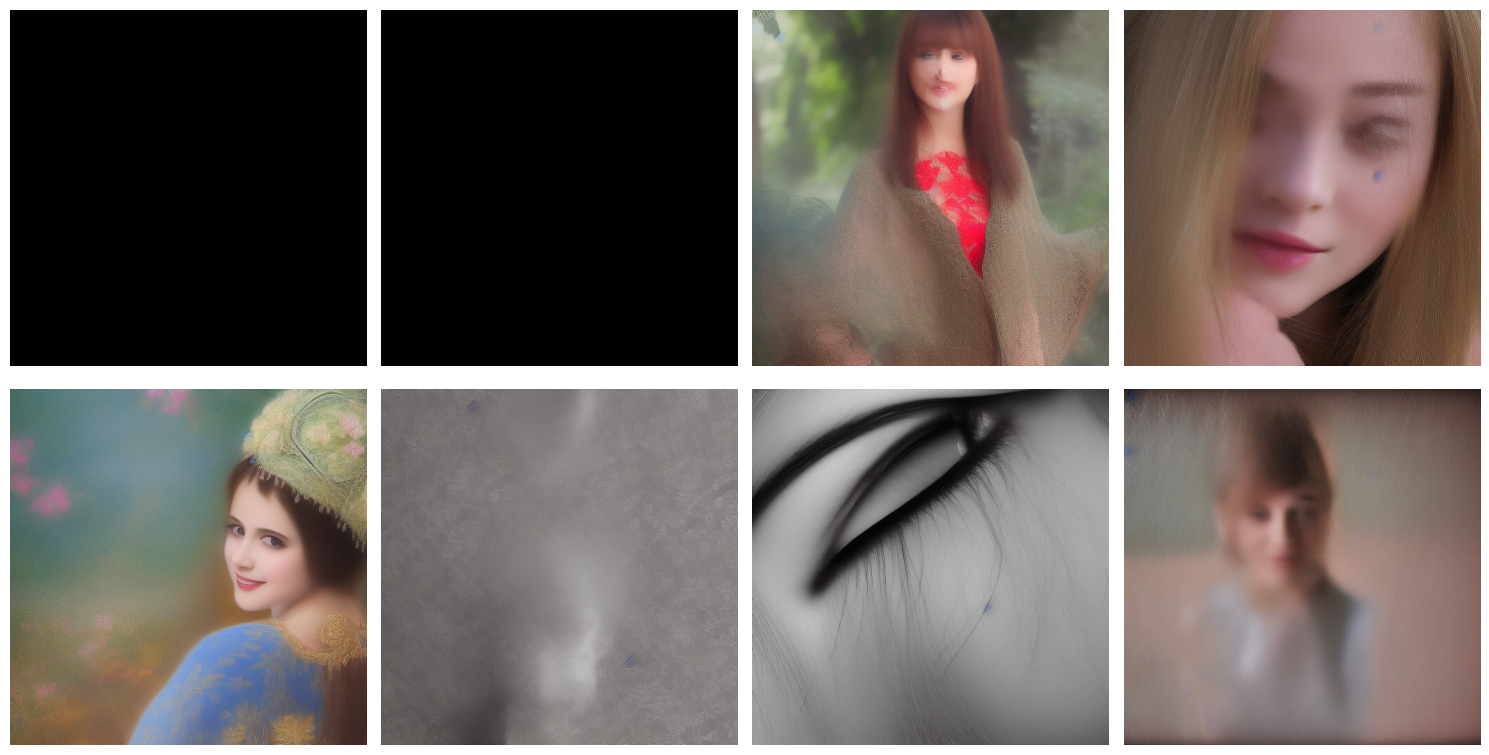

In [95]:
# prompt from https://civitai.com/images/16407281

prompt = "(RAW photo, best quality), (realistic, photo-realistic:1.4), masterpiece, extremely beautiful, extremely detailed, 4k wallpaper, Amazing, finely detail, ultra-detailed, highres, beautiful detailed girl, extremely detailed eyes and face, 1girl, solo, looking at viewer, smile, short hair, bangs, simple background, shirt, black hair, hair ornament, long sleeves, white shirt, upper body, necktie, black eyes, lips, realistic, kooo123, lora CHAEWO"
n_prompt = "3d, sepia, painting, cartoons, sketch, watercolor, flat color, (worst quality:2), (low quality:2), (normal quality:2),out of focus,ugly,error, bad anatomy, ((monochrome)), (grayscale), deformed eyes, bad face,(worst quality:2), (low quality:2), (normal quality:2), (bad hands :1.8) ng_deepnegative_v1_75t"

images = pipe(prompt=prompt,
             negative_prompt=n_prompt,
             height=512,
             width=512,
             num_inference_steps=5,
             guidance_scale=7,
             num_images_per_prompt=8
        ).images

import matplotlib.pyplot as plt
fig, axs = plt.subplots(2, 4, figsize=(15, 8))
for i, ax in enumerate(axs.flatten()):
    ax.imshow(images[i])
    ax.axis('off')

plt.tight_layout()
plt.show()

### guidance_scale의 영향

The following part of your input was truncated because CLIP can only handle sequences up to 77 tokens: [', hair ornament, long sleeves, white shirt, upper body, necktie, black eyes, lips, realistic, kooo 1 2 3, lora chaewo']
100%|███████████████████████████████████████████| 20/20 [00:01<00:00, 14.56it/s]
Potential NSFW content was detected in one or more images. A black image will be returned instead. Try again with a different prompt and/or seed.


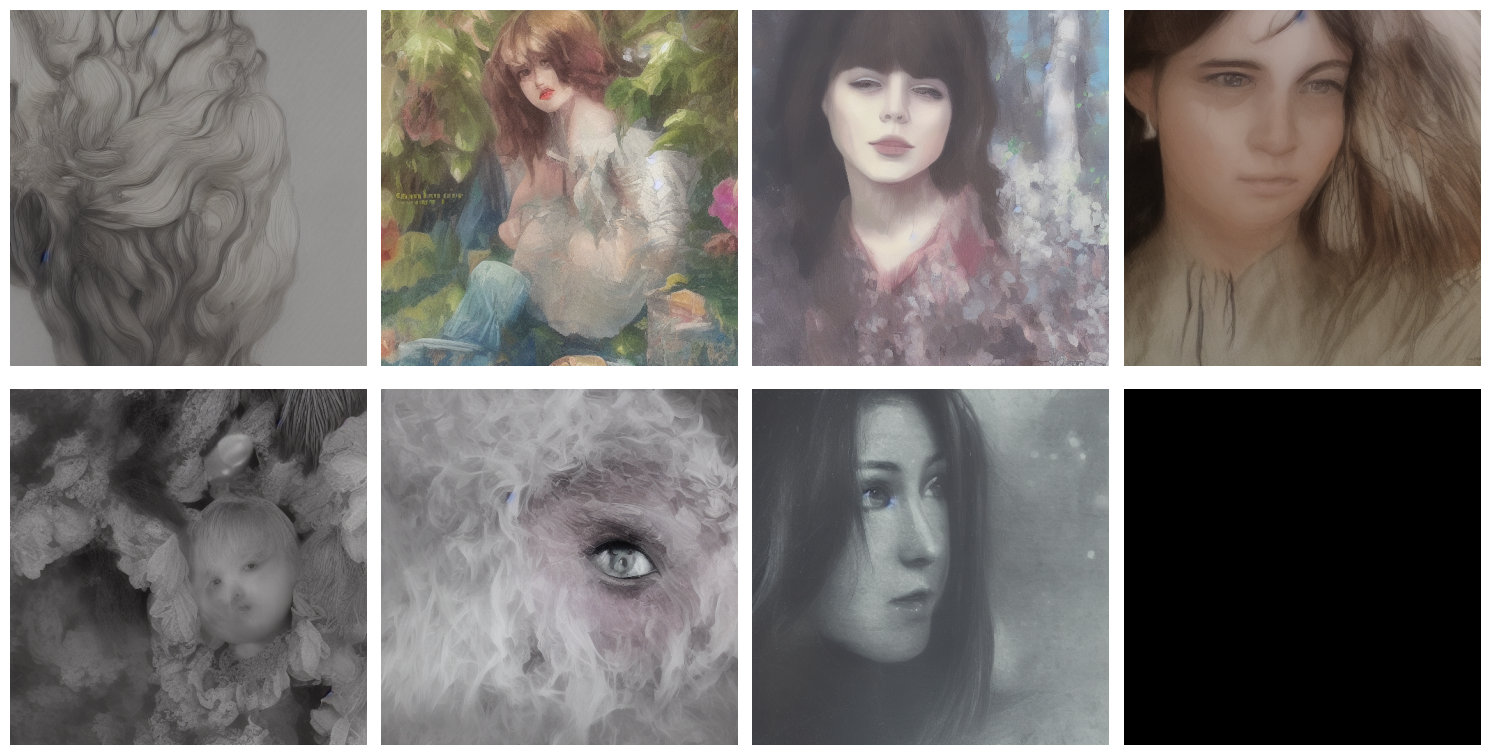

In [96]:
# prompt from https://civitai.com/images/16407281

prompt = "(RAW photo, best quality), (realistic, photo-realistic:1.4), masterpiece, extremely beautiful, extremely detailed, 4k wallpaper, Amazing, finely detail, ultra-detailed, highres, beautiful detailed girl, extremely detailed eyes and face, 1girl, solo, looking at viewer, smile, short hair, bangs, simple background, shirt, black hair, hair ornament, long sleeves, white shirt, upper body, necktie, black eyes, lips, realistic, kooo123, lora CHAEWO"
n_prompt = "3d, sepia, painting, cartoons, sketch, watercolor, flat color, (worst quality:2), (low quality:2), (normal quality:2),out of focus,ugly,error, bad anatomy, ((monochrome)), (grayscale), deformed eyes, bad face,(worst quality:2), (low quality:2), (normal quality:2), (bad hands :1.8) ng_deepnegative_v1_75t"

images = pipe(prompt=prompt,
             negative_prompt=n_prompt,
             height=512,
             width=512,
             num_inference_steps=20,
             guidance_scale=1,
             num_images_per_prompt=8
        ).images

import matplotlib.pyplot as plt
fig, axs = plt.subplots(2, 4, figsize=(15, 8))
for i, ax in enumerate(axs.flatten()):
    ax.imshow(images[i])
    ax.axis('off')

plt.tight_layout()
plt.show()